In [1]:
import numpy as np
print('numpy version:', np.__version__)

import matplotlib as mpl
print('matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt


numpy version: 1.23.5
matplotlib version: 3.6.2


In [2]:
X = np.array([[0,0], [2,0], [1,1], [0,2], [3,3], [4,1], [5,2], [1,4], [4,4], [5,5]])
Y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])
num_of_mistakes = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15])

In [3]:
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

In [6]:
theta_0 = (Y * num_of_mistakes).sum()
theta_0

-110

In [17]:
phi_x = np.array([phi(x) for x in X])
phi_x

array([[ 0.        ,  0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        ],
       [ 1.        ,  1.41421356,  1.        ],
       [ 0.        ,  0.        ,  4.        ],
       [ 9.        , 12.72792206,  9.        ],
       [16.        ,  5.65685425,  1.        ],
       [25.        , 14.14213562,  4.        ],
       [ 1.        ,  5.65685425, 16.        ],
       [16.        , 22.627417  , 16.        ],
       [25.        , 35.35533906, 25.        ]])

In [45]:
theta = (phi_x * Y.reshape(-1, 1) * num_of_mistakes.reshape(-1, 1)).sum(axis=0)
theta

array([ 21.      , -22.627417,  22.      ])

In [37]:
pos = np.ma.masked_equal(Y, -1)
neg = np.ma.masked_where(Y == 1, Y)
pos

masked_array(data=[--, --, --, --, --, 1, 1, 1, 1, 1],
             mask=[ True,  True,  True,  True,  True, False, False, False,
                   False, False],
       fill_value=-1)

In [40]:
neg

masked_array(data=[2, 2, 2, 2, 2, --, --, --, --, --],
             mask=[False, False, False, False, False,  True,  True,  True,
                    True,  True],
       fill_value=999999)

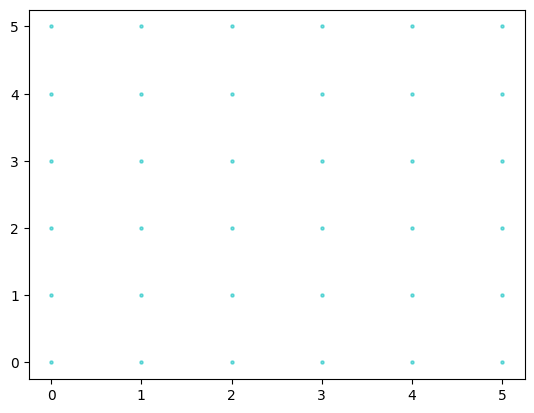

In [56]:
area_x1 = np.arange(0, 5.1, 1)
area_x2 = np.arange(0, 5.1, 1)
grid_x1, grid_x2 = np.meshgrid(area_x1, area_x2)
plt.scatter(grid_x1, grid_x2, c='c', s=5, alpha=0.5)

In [58]:
np.array([phi(x) for x in np.c_[grid_x1.reshape(-1, 1), grid_x2.reshape(-1, 1)]])

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        ],
       [ 9.        ,  0.        ,  0.        ],
       [16.        ,  0.        ,  0.        ],
       [25.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 1.        ,  1.41421356,  1.        ],
       [ 4.        ,  2.82842712,  1.        ],
       [ 9.        ,  4.24264069,  1.        ],
       [16.        ,  5.65685425,  1.        ],
       [25.        ,  7.07106781,  1.        ],
       [ 0.        ,  0.        ,  4.        ],
       [ 1.        ,  2.82842712,  4.        ],
       [ 4.        ,  5.65685425,  4.        ],
       [ 9.        ,  8.48528137,  4.        ],
       [16.        , 11.3137085 ,  4.        ],
       [25.        , 14.14213562,  4.        ],
       [ 0.        ,  0.        ,  9.        ],
       [ 1.        ,  4.24264069,  9.        ],
       [ 4.        ,  8.48528137,  9.   

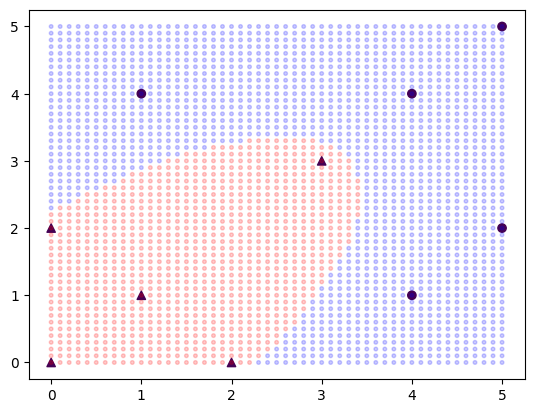

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=1*pos, marker='o')
plt.scatter(X[:, 0], X[:, 1], c=-2*neg, marker='^')
area = {'x': [], 'y': [], 'c': []}
for x1 in np.arange(0, 5.1, 0.1):
    for x2 in np.arange(0, 5.1, 0.1):
        area['x'].append(x1)
        area['y'].append(x2)
        c = 'b' if (theta * phi(np.array([x1, x2]))).sum() + theta_0 >= 0 else 'r'
        area['c'].append(c)
plt.scatter(area['x'], area['y'], c=area['c'], s=7, alpha=0.2)